In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [6]:
#przejscie do folderu
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [7]:
ls data

Day4.ipynb  men_shoes.csv  shoes_prices.csv


In [9]:
df = pd.read_csv('data/men_shoes.csv', low_memory = False)
df.shape

(18280, 48)

In [10]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [11]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [12]:
[1] *5

[1, 1, 1, 1, 1]

In [13]:
[3] *5

[3, 3, 3, 3, 3]

In [0]:
#prognozujemy ze kazdy but ksztuje średnią cene

In [17]:
y_true = df['prices_amountmin']
y_true.shape[0]
#o [0] zeby dostac tylko liczbe, bez [0] jest lista

18280

In [0]:
 y_pred = [mean_price] * y_true.shape[0]

In [19]:
mean_absolute_error(y_true, y_pred)

63.968341227870624

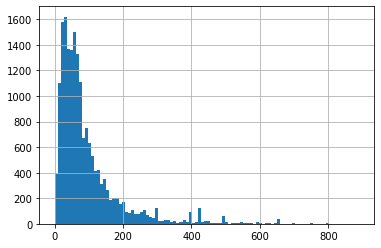

In [20]:
df['prices_amountmin'].hist(bins=100)

In [0]:
#logarytmizujemy te wartosci

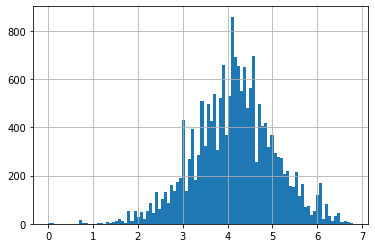

In [25]:
np.log( df['prices_amountmin'] +1) .hist(bins=100)
# dodajemy jeden bo log z 0 to - nieskonconosc
#mozna tez uzyc np.loglp

In [27]:
#prognozujemy na podstawie mediany
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [34]:
#prognozujemy z log, okazuje sie ze mediana dziala lepiej
y_true = df['prices_amountmin']
price_log_mean = np.exp(np.mean(np.log1p(y_true)))-1
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)
#zamiast z ep odejmowac -1 mozna uzyc expm1

58.03539547661041

In [30]:
#wyjasnienie powyzszego
#logarytm z calej kolumny
np.log1p(y_true)

0        3.710886
1        3.970103
2        3.714060
3        3.937886
4        3.855664
           ...   
18275    3.432373
18276    4.188897
18277    3.510948
18278    3.480625
18279    4.290459
Name: prices_amountmin, Length: 18280, dtype: float64

In [31]:
#srednia z wartosci log
np.mean(np.log1p(y_true))

4.157759197235119

In [33]:
#exp ze sredniej (odwrotnosci log)
# odejmujemy - -1 bo log1p dodao
np.exp(np.mean(np.log1p(y_true)))-1

62.92811169273113

In [35]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
#dodajmy wymiary

In [37]:
df.brand.value_counts()

Nike             1709
PUMA              574
Ralph Lauren      524
New Balance       361
VANS              356
                 ... 
Zildjian            1
Ballcap Buddy       1
mizuno              1
AND 1               1
Tallia              1
Name: brand, Length: 1856, dtype: int64

In [0]:
#uczenie potzebuje liczb, musimy od nazwy przyporzadkowac liczby

In [39]:
df['brand'].factorize()

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [41]:
#zamiast brandu mamy id
df['brand'].factorize()[0]

array([  0,   0,   1, ..., 411, 411, 411])

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [50]:
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth = 5)

scores = cross_val_score(model,X, y, scoring = 'neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [49]:
#info jakie mamy metryki
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth = 5)

  scores = cross_val_score(model,X, y, scoring = 'neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [52]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [53]:
df['manufacturer'].value_counts()

Puma                    476
Nike                    374
New Balance             249
VANS                    170
Reebok                  128
                       ... 
Tsubo                     1
MEZLAN                    1
VIONIC BY ORTHAHEEL       1
Zoot Sports               1
RG Barry Corporation      1
Name: manufacturer, Length: 618, dtype: int64

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [55]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [56]:
run_model(['brand_cat','manufacturer_cat'])

(-58.539304199085976, 4.311223231615445)

In [0]:
!git add matrix_one/Dzien3.ipynb

In [58]:
!git commit -m "day4"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@dcf055c15710.(none)')


In [0]:
!git config --global user.email "tomaszszpila17@gmail.com "
!git config --global user.name "Tomek"

In [60]:
!git commit -m "day4"

[master 6f02014] day4
 1 file changed, 1 insertion(+), 1 deletion(-)


In [61]:
!git push -u origin master

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 769 bytes | 256.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/tszpilaDS/dw_matrix.git
   aa9a992..6f02014  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
